In [53]:
import numpy as np
import matplotlib.pyplot as plt
import os
#%matplotlib inline
figure_path = "/home/simon/eth/asl-fall17-project/report/Data/71/"

In [13]:
def MVA(N,Z,M,S,V, device_type):
    # Inputs
    # N = Number of users
    # Z = think time
    # M = Number of devices
    # S = Service time per visit to the ith device
    # V = Number of visits to the ith device

    # Device types, Fixed capacity [0], Delay center [1]

    # Outputs
    # X_sys System Throughput
    # Q[i] Avg. number of jobs at the ith device
    Q = np.zeros(M)
    # R[i] Response time of the ith device
    R = np.zeros(M)
    # R_sys System Response time
    # U[i] Utilization of ith device 
    U = np.zeros(M)
    for n in xrange(0,N):
        for i in xrange(0,M):
            if device_type[i] == 0:
                R[i] = S[i]*(1+Q[i])
            else:
                R[i] = S[i]

        R_sys = np.sum(np.multiply(R,V))
        X_sys = N/(Z+R_sys)

        for i in xrange(0,M):
            Q[i] = X_sys*V[i]*R[i]

    # Device throughputs
    X = np.multiply(X_sys,V)
    # Device utilizations
    U = np.multiply(X_sys, np.multiply(S,V))
    return X_sys, Q, R, R_sys, U, X


8
2
[  1.22524339e-02   1.22524339e-03   1.98221408e+00   4.28835188e-03]
8
8
[  4.00673705e-02   4.00673705e-03   7.94168674e+00   1.40235797e-02]
8
16
[  5.13405630e-02   5.13405630e-03   1.59252009e+01   1.79691971e-02]
8
32
[  4.34894870e-02   4.34894870e-03   3.19366860e+01   1.52213204e-02]
8
48
[  4.39796348e-02   4.39796348e-03   4.79359695e+01   1.53928722e-02]
8
64
[  4.28225668e-02   4.28225668e-03   6.39376608e+01   1.49878984e-02]
8
80
[  4.20919380e-02   4.20919380e-03   7.99387286e+01   1.47321783e-02]
16
2
[ 0.02422405  0.0024224   1.96479738  0.00847842]
16
8
[ 0.07993967  0.00799397  7.8832177   0.02797889]
16
16
[  1.14877890e-01   1.14877890e-02   1.58316092e+01   4.02072615e-02]
16
32
[  1.24428634e-01   1.24428634e-02   3.18174387e+01   4.35500221e-02]
16
48
[  1.14613421e-01   1.14613421e-02   4.78320012e+01   4.01146975e-02]
16
64
[  1.10371276e-01   1.10371276e-02   6.38382862e+01   3.86299466e-02]
16
80
[  1.08308398e-01   1.08308398e-02   7.98413406e+01   3.7

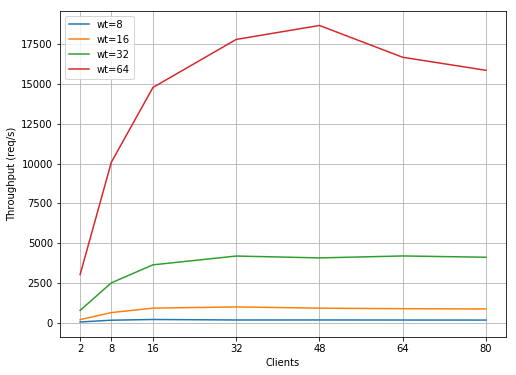

In [89]:
# 3.1 GETs
figure1 = plt.figure(1, figsize=(8,6))
X_axis = [2, 8, 16, 32, 48, 64, 80]

Z = 0.00
get_mean_rt = [[2.5884999999999998, 3.1713333333333331, 4.9630000000000001, 11.749666666666668, 17.439333333333334, 23.889333333333337, 30.386333333333329], [2.5954999999999999, 3.1556666666666664, 4.4100000000000001, 8.1826666666666661, 13.354666666666667, 18.508666666666667, 23.589333333333332], [2.5409999999999999, 3.1720000000000002, 4.4063333333333334, 7.7203333333333335, 11.963999999999999, 15.517666666666665, 19.797666666666668], [2.52, 3.0573333333333337, 4.2370000000000001, 7.1643333333333326, 10.325000000000001, 15.515333333333333, 20.456333333333333]]
worker_index = 0
get_mean_tp = []
for wt in [8, 16, 32, 64]:
    wt_tp = []
    worker_index +=1
    user_index = 0
    for users in [2, 8, 16, 32, 48, 64, 80]:    
        user_index += 1
        
        device_types = []
        S = []
        V = []
        # Network + NetHandler
        device_types.append(1)
        S.append(0.002) # 2ms
        V.append(1)
        # Requests Queue
        device_types.append(0)
        S.append(0.0002) 
        V.append(1)
        # Workers
        device_types.append(1)
        #S.append(0.070) # 1ms
        S.append(get_mean_rt[worker_index-1][user_index-1])
        V.append(1.0/wt)
        
        # Server
        device_types.append(0)
        S.append(0.0007)
        V.append(1.0)
        
        M = len(S)
        X_sys, Q, R, R_sys, U, X = MVA(users,Z,M,S,V,device_types)
        print wt
        print users
        print U
        #print U
        #print R_sys
        #print X_sys
        wt_tp.append(X_sys)
    get_mean_tp.append(wt_tp)
    
    plt.plot(X_axis,np.multiply(wt_tp,wt), label="wt=" + str(wt))
plt.legend()
plt.grid()
plt.xlabel("Clients")
plt.ylabel("Throughput (req/s)")
plt.xticks(X_axis)
plt.savefig(figure_path+"71_31get.png")

import distutils.dir_util
p = figure_path + "71_31get/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
f.write("\r\nget_mean_tp\r\n")
f.write(str(get_mean_tp))
f.close()

8
2
[  1.22524339e-02   1.22524339e-03   1.98221408e+00   4.28835188e-03]
8
8
[  4.00673705e-02   4.00673705e-03   7.94168674e+00   1.40235797e-02]
8
16
[  5.13405630e-02   5.13405630e-03   1.59252009e+01   1.79691971e-02]
8
32
[  4.34894870e-02   4.34894870e-03   3.19366860e+01   1.52213204e-02]
8
48
[  4.39796348e-02   4.39796348e-03   4.79359695e+01   1.53928722e-02]
8
64
[  4.28225668e-02   4.28225668e-03   6.39376608e+01   1.49878984e-02]
8
80
[  4.20919380e-02   4.20919380e-03   7.99387286e+01   1.47321783e-02]
16
2
[ 0.02422405  0.0024224   1.96479738  0.00847842]
16
8
[ 0.07993967  0.00799397  7.8832177   0.02797889]
16
16
[  1.14877890e-01   1.14877890e-02   1.58316092e+01   4.02072615e-02]
16
32
[  1.24428634e-01   1.24428634e-02   3.18174387e+01   4.35500221e-02]
16
48
[  1.14613421e-01   1.14613421e-02   4.78320012e+01   4.01146975e-02]
16
64
[  1.10371276e-01   1.10371276e-02   6.38382862e+01   3.86299466e-02]
16
80
[  1.08308398e-01   1.08308398e-02   7.98413406e+01   3.7

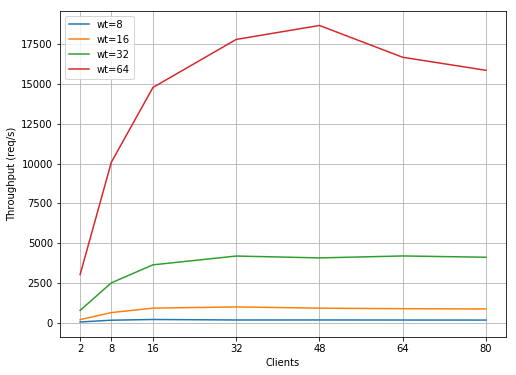

In [92]:
# 3.1 SETs
figure2 = plt.figure(1, figsize=(8,6))
X_axis = [2, 8, 16, 32, 48, 64, 80]

Z = 0.00
set_mean_rt = [[2.3559999999999999, 2.4453333333333336, 2.6576666666666671, 7.1029999999999989, 11.640000000000001, 16.156333333333333, 20.792666666666666], [2.466333333333333, 2.4336666666666669, 2.5210000000000004, 4.562333333333334, 7.5263333333333335, 10.879333333333333, 14.112], [2.327, 2.4419999999999997, 2.5493333333333332, 4.2830000000000004, 6.4490000000000007, 8.4249999999999989, 10.846666666666666], [2.3294999999999999, 2.4293333333333336, 2.5459999999999998, 4.3036666666666674, 6.0564999999999998, 7.6439999999999992, 9.7100000000000009]]
worker_index = 0
set_mean_tp = []
for wt in [8, 16, 32, 64]:
    wt_tp = []
    worker_index +=1
    user_index = 0
    for users in [2, 8, 16, 32, 48, 64, 80]:    
        user_index += 1
        
        device_types = []
        S = []
        V = []
        # Network + NetHandler
        device_types.append(1)
        S.append(0.002) # 2ms
        V.append(1)
        # Requests Queue
        device_types.append(0)
        S.append(0.0002) 
        V.append(1)
        # Workers
        device_types.append(1)
        #S.append(0.070) # 1ms
        S.append(get_mean_rt[worker_index-1][user_index-1])
        V.append(1.0/wt)
        
        # Server
        device_types.append(0)
        S.append(0.0007)
        V.append(1.0)
        
        M = len(S)
        X_sys, Q, R, R_sys, U, X = MVA(users,Z,M,S,V,device_types)
        print wt
        print users
        print U
        wt_tp.append(X_sys)
    set_mean_tp.append(wt_tp)
    
    plt.plot(X_axis,np.multiply(wt_tp,wt), label="wt=" + str(wt))
    
plt.legend()
plt.grid()
plt.xlabel("Clients")
plt.ylabel("Throughput (req/s)")
plt.xticks(X_axis)
plt.savefig(figure_path+"71_31set.png")

import distutils.dir_util
p = figure_path + "71_31set/"
distutils.dir_util.mkpath(p)
f = open(p+"processed.log", "w+")
f.write("X_axis\r\n")
f.write(str(X_axis))
f.write("\r\nset_mean_tp\r\n")
f.write(str(set_mean_tp))
f.close()


In [15]:
print U

[ 2.82058658  0.          0.02203583  0.9872053 ]
